In [1]:
%matplotlib inline
import xarray as xr
import os
import numpy as np
import matplotlib.pyplot as plt
import collections
import seaborn as sns

In [2]:
domain = xr.open_dataset(os.path.join('/p/work1/gergel/lwe', 
                                      'domain.lnd.wr50a_ar9v4.100920.nc'))
grid = xr.open_dataset(os.path.join('/p/home/gergel/data/25km', 
                                      'griddata_wr50a_130607.nc'))

In [3]:
plot_direc = '/p/home/gergel/plots/chapter2'

select out first five ensemble members for each warming scenario since the full time series isn't available for the 1pt5 warming scenario. 

Also, note that the 11th ensemble member isn't available for daily `H2OSNO` output, so that's why we haven't included it in this Jupyter notebook. 

__Load all of the SWE data__

In [4]:
# /p/work1/gergel/lwe/H2OSNO/daily/arctic

swe_hist_file = xr.open_mfdataset(os.path.join('/p/work1/gergel/lwe/H2OSNO/daily/arctic/hist_part', 
                                                'b.e11.B20TRC5CNBDRD.f09_g16*'),
                                  concat_dim='ensemble_member')
swe_hist = swe_hist_file['H2OSNO'].sel(time=slice('1976-09-01', '2005-08-31'))


swe_2pt0_file = xr.open_mfdataset(os.path.join('/p/work1/gergel/lwe/H2OSNO/daily/arctic/2pt0_part', 
                                                'b.e11.BRCP26C5CNBDRD.f09_g16.2pt0degC.*.clm2.h1.H2OSNO.2006*'),
                                  concat_dim='ensemble_member')
swe_2pt0 = swe_2pt0_file['H2OSNO'].sel(time=slice('2070-09-01', '2099-08-31'))

swe_future_file = xr.open_mfdataset(os.path.join('/p/work1/gergel/lwe/H2OSNO/daily/arctic/future_part', 
                                        'b.e11.BRCP85C5CNBDRD.f09_g16.*.clm2.h1.H2OSNO.20060101-21001231*'), 
                                    concat_dim='ensemble_member')
swe_future = swe_future_file['H2OSNO'].sel(time=slice('2070-09-01', '2099-08-31'))

In [5]:
swe_1pt5_file = xr.open_mfdataset(os.path.join('/p/work1/gergel/lwe/H2OSNO/daily/arctic', 
                                                'b.e11.BRCP26C5CNBDRD.f09_g16.1pt5degC.*.clm2.h1.H2OSNO.2006*'),
                                  concat_dim='ensemble_member')
swe_1pt5 = swe_1pt5_file['H2OSNO']

__calculate mean swe across ensemble members and differences between historical and future periods__

In [6]:
peak_swe_hist_mean = swe_hist.groupby('time.year').max('time').mean('year').mean('ensemble_member')

peak_swe_1pt5_mean = swe_1pt5.groupby('time.year').max('time').mean('year').mean('ensemble_member')
peak_swe_2pt0_mean = swe_2pt0.groupby('time.year').max('time').mean('year').mean('ensemble_member')
peak_swe_future_mean = swe_future.groupby('time.year').max('time').mean('year').mean('ensemble_member')

In [7]:
peak_swe_1pt5_diff = (peak_swe_1pt5_mean - peak_swe_hist_mean).load()
peak_swe_2pt0_diff = (peak_swe_2pt0_mean - peak_swe_hist_mean).load()
peak_swe_future_diff = (peak_swe_future_mean - peak_swe_hist_mean).load()

/p/home/gergel/miniconda3/envs/pangeo_onyx/lib/python3.6/site-packages/dask/compatibility.py:93: RuntimeWarning: All-NaN slice encountered
  return func(*args, **kwargs)
/p/home/gergel/miniconda3/envs/pangeo_onyx/lib/python3.6/site-packages/toolz/functoolz.py:468: RuntimeWarning: All-NaN slice encountered
  ret = f(ret)
/p/home/gergel/miniconda3/envs/pangeo_onyx/lib/python3.6/site-packages/dask/array/numpy_compat.py:28: RuntimeWarning: divide by zero encountered in true_divide
  x = np.divide(x1, x2, out)
/p/home/gergel/miniconda3/envs/pangeo_onyx/lib/python3.6/site-packages/dask/array/numpy_compat.py:28: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide(x1, x2, out)


__this time don't take mean across ensemble members since we need the full ensemble range for computing the std__

In [8]:
peak_swe_hist = swe_hist.groupby('time.year').max('time').mean('year')

peak_swe_1pt5 = swe_1pt5.groupby('time.year').max('time').mean('year')
peak_swe_2pt0 = swe_2pt0.groupby('time.year').max('time').mean('year')
peak_swe_future = swe_future.groupby('time.year').max('time').mean('year')

In [9]:
peak_swe_1pt5_diff_std = ((peak_swe_1pt5 - peak_swe_hist).std('ensemble_member')).load()
peak_swe_2pt0_diff_std = ((peak_swe_2pt0 - peak_swe_hist).std('ensemble_member')).load()
peak_swe_future_diff_std = ((peak_swe_future - peak_swe_hist).std('ensemble_member')).load()

/p/home/gergel/miniconda3/envs/pangeo_onyx/lib/python3.6/site-packages/dask/array/reductions.py:384: RuntimeWarning: divide by zero encountered in true_divide
  u = total / n
/p/home/gergel/miniconda3/envs/pangeo_onyx/lib/python3.6/site-packages/dask/array/reductions.py:384: RuntimeWarning: invalid value encountered in true_divide
  u = total / n


__plot changes in the amount of peak SWE - ensemble mean and standard deviation across the ensemble__

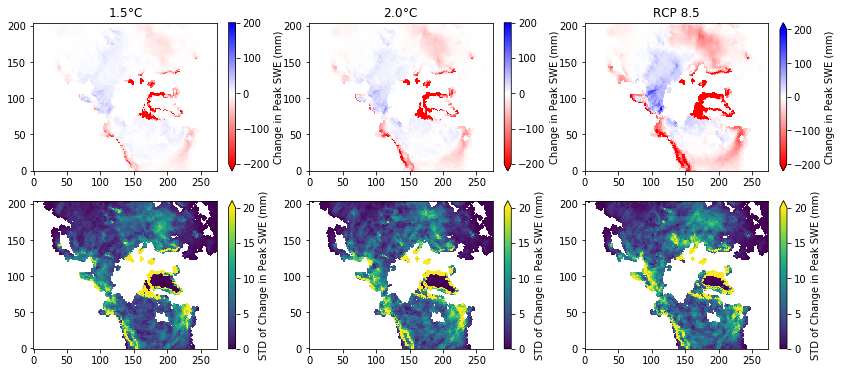

In [10]:
fig, axes = plt.subplots(2, 3, figsize=(14, 6))

vmin_mean = -200
vmax_mean = 200
cmap_mean = 'bwr_r'
# ensemble mean changes in snow
peak_swe_1pt5_diff.plot(ax=axes[0, 0], robust=True, add_labels=False, 
                        cbar_kwargs={'label': 'Change in Peak SWE (mm)'}, 
                        vmin=vmin_mean, vmax=vmax_mean, 
                        cmap=cmap_mean)
axes[0,0].set_title('$1.5\degree$C')

peak_swe_2pt0_diff.plot(ax=axes[0, 1], robust=True, add_labels=False, 
                        cbar_kwargs={'label': 'Change in Peak SWE (mm)'}, 
                        vmin=vmin_mean, vmax=vmax_mean, 
                        cmap=cmap_mean)
axes[0,1].set_title('$2.0\degree$C')

peak_swe_future_diff.plot(ax=axes[0, 2], robust=True, add_labels=False, 
                          cbar_kwargs={'label': 'Change in Peak SWE (mm)'}, 
                          vmin=vmin_mean, vmax=vmax_mean, 
                          cmap=cmap_mean)
axes[0,2].set_title('RCP 8.5')

vmin_std = 0
vmax_std = 20
# standard deviation of change in swe across ensemble members
peak_swe_1pt5_diff_std.plot(ax=axes[1, 0], robust=True, add_labels=False, 
                            cbar_kwargs={'label': 'STD of Change in Peak SWE (mm)'}, 
                            vmin=vmin_std, vmax=vmax_std)

peak_swe_2pt0_diff_std.plot(ax=axes[1, 1], robust=True, add_labels=False, 
                            cbar_kwargs={'label': 'STD of Change in Peak SWE (mm)'}, 
                            vmin=vmin_std, vmax=vmax_std)

peak_swe_future_diff_std.plot(ax=axes[1, 2], robust=True, add_labels=False, 
                              cbar_kwargs={'label': 'STD of Change in Peak SWE (mm)'}, 
                              vmin=vmin_std, vmax=vmax_std)

fig.savefig(os.path.join(plot_direc, 
                         'peak_swe_amount_spatial_changes'), dpi=200)

find timing of peak SWE and how it changes

see this SO post: https://stackoverflow.com/questions/40179593/how-to-get-the-coordinates-of-the-maximum-in-xarray

In [11]:
# how to find max: 
# da.where(da==da.max(), drop=True).squeeze()

In [12]:
# peak_swe_hist.where(peak_swe_hist==peak_swe_hist.max('time'), drop=True).squeeze()
swe_hist_year = swe_hist.groupby('time.year')
swe_hist_year.where(swe_hist_year==swe_hist_year.max('time'), drop=True).squeeze()

TypeError: where() got an unexpected keyword argument 'drop'

In [ ]:
# swe_hist.groupby('time.year').apply(lambda x: np.argmax(x), shortcut=False)
u = (swe_hist.groupby('time.year').apply(lambda x: np.argmax(x, axis=1), 
                                        shortcut=False)).chunk({'ensemble_member': 5, 'year': 30, 'nj': 205, 'ni':275})

In [ ]:
swe_hist.time

In [ ]:
# u.mean('ensemble_member').mean('year').plot()